# Week1-a: Adder in Quantum Circuits
This week, we will start from learning how to perform simple additions using quantum circuits!<br/>

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute

IBMQ.load_account()

//anaconda3/envs/qiskit023_2/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

# Learning Exercise I-A
The full adder takes two binary numbers plus an overflow bit as its input, which we will call X.
Create a full adder from a quantum circuit and execute the outputs with input data;

$A=1$, $B=0$, $X=1$
. 

The truth table for the full adder is given below.

|A(input)|B(input)|X(carry input)|S(sum)|C(carry out)|
|--|--|--|--|--|
|0|0|0|0|0|
|0|0|1|1|0|
|0|1|0|1|0|
|0|1|1|0|1|
|1|0|0|1|0|
|1|0|1|0|1|
|1|1|0|0|1|
|1|1|1|1|1|

Denote your quantum register as 'q', classical register as 'c'. Assign inputs A, B and X to q[0], q[1] and q[2] respectively, the sum output S to c[0] and carry output C to c[1].

# Example Answer

By using two half adders and an OR gate, you can create a full adder as shown below.

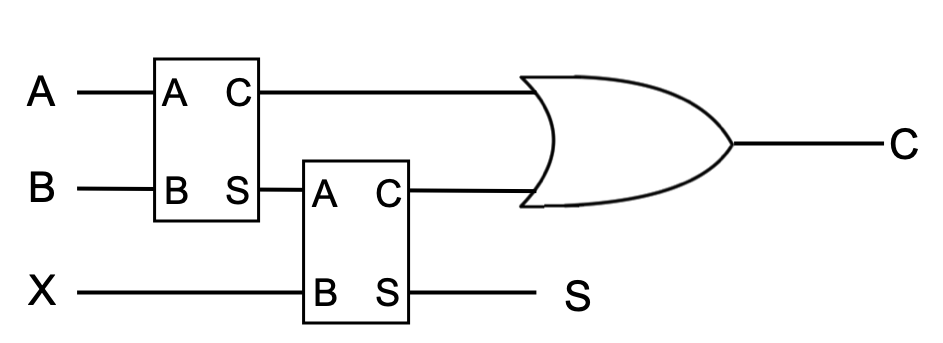

In [2]:
from IPython.display import Image, display
Image('adder.png')

{'10': 1000}


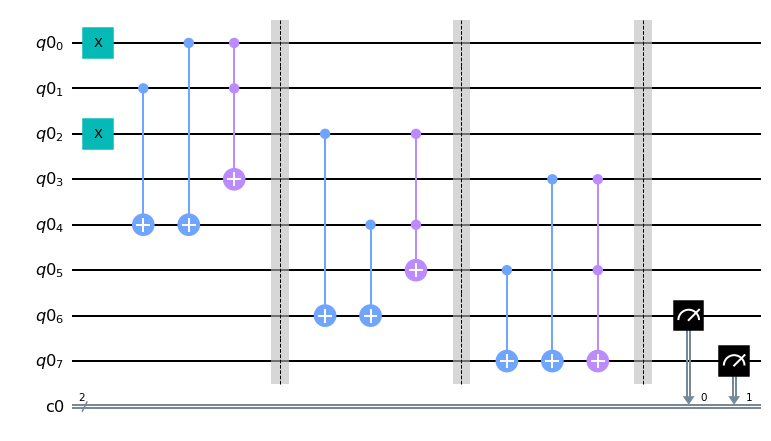

In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute

##### build your quantum circuit here

# Define registers
q = QuantumRegister(8)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)

# Define input data
qc.x(0)
qc.x(2)

# Define quantum circuit
def OR(a,b,c):
    qc.cx(q[b], q[c])
    qc.cx(q[a], q[c])
    qc.ccx(q[a], q[b], q[c])
    
def hadder(a,b,s,c):
    #XOR
    qc.cx(q[b], q[s])
    qc.cx(q[a], q[s])
    #AND
    qc.ccx(q[a], q[b], q[c])
    
hadder(0,1,4,3)
qc.barrier(q)
hadder(4,2,6,5)
qc.barrier(q)
OR(3,5,7)
qc.barrier(q)

#measure 
qc.measure(q[6], c[0])
qc.measure(q[7], c[1])

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()
count =result.get_counts()
print(count)
qc.draw(output='mpl')